## Desafio 1


Tendo como referência a imagem abaixo (no repositório, “imagens/nota-fiscal.png”), realize alguma transformação de tal forma que fique somente o boleto na imagem, sem o background, ajustando sua perspectiva.
Tal operação é similar utilizado em aplicações de escaneamento de documentos.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

Text(0.5,1,'Original')

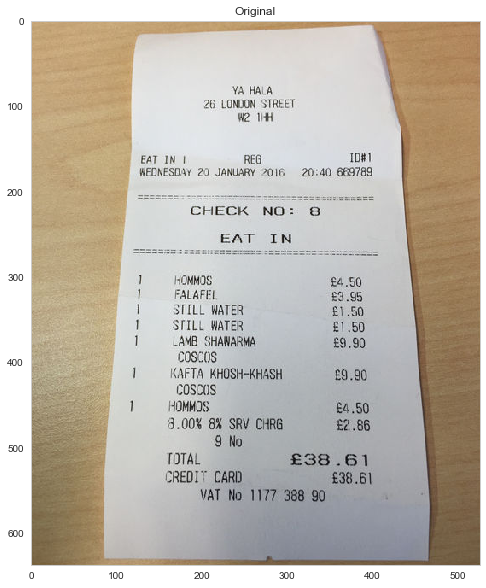

In [3]:
imagem = cv2.imread("nota-fiscal.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Original")

637 526


Text(0.5,1,'Marcadores')

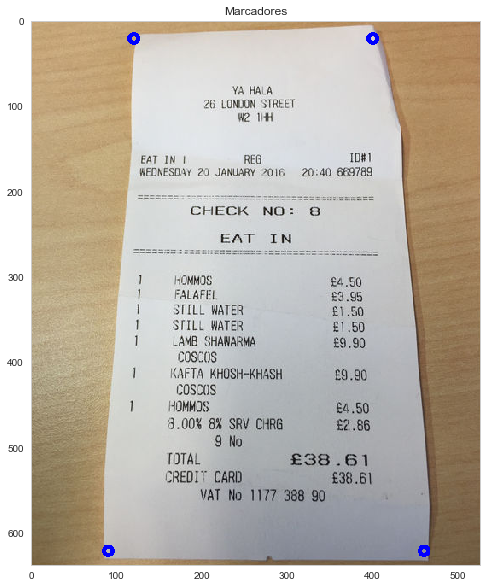

In [9]:
height, width = imagem.shape[:2]

print(height, width)

imagem_marcador = imagem.copy()

pontos_marcador = np.float32([[120,20],[400,20],[90,620],[460,620]])
pontos_expansao = np.float32([[0,0],[650,0],[0,650],[550,650]])

color = (0, 0, 255)

cv2.circle(imagem_marcador, (120,20), 5, color, 3)
cv2.circle(imagem_marcador, (400,20), 5, color, 3)
cv2.circle(imagem_marcador, (90,620), 5, color, 3)
cv2.circle(imagem_marcador, (460,620), 5, color, 3)

plt.figure(figsize=(20,10))
plt.imshow(imagem_marcador)
plt.title("Marcadores")

Text(0.5,1,'Expandida')

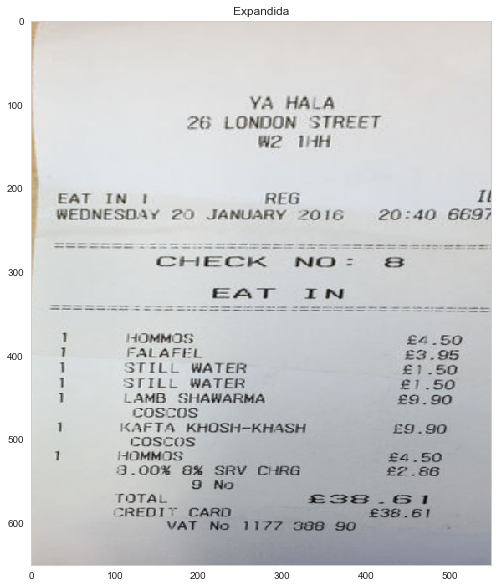

In [10]:
matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcador, pontos_expansao)
imagem_expandida = cv2.warpPerspective(imagem,matriz_perspectiva,(550,650))

plt.figure(figsize=(20,10))
plt.imshow(imagem_expandida)
plt.title("Expandida")